# Приоритизация гипотез и анализ результатов A/B теста

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача:
* Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Описание данных

Данные для первой части:

Файл /datasets/hypothesis.csv

* Hypothesis — **краткое описание гипотезы;**
* Reach — **охват пользователей по 10-балльной шкале;**
* Impact — **влияние на пользователей по 10-балльной шкале;**
* Confidence — **уверенность в гипотезе по 10-балльной шкале;**
* Efforts — **затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.**

Данные для второй части:

Файл /datasets/orders.csv

* transactionId — **идентификатор заказа;**
* visitorId — **идентификатор пользователя, совершившего заказ;**
* date — **дата, когда был совершён заказ;**
* revenue — **выручка заказа;**
* group — **группа A/B-теста, в которую попал заказ.**

Файл /datasets/visitors.csv

* date — **дата;**
* group — **группа A/B-теста;**
* visitors — **количество пользователей в указанную дату в указанной группе A/B-теста**

## Работа с проектом

### Открываю файл с данными и изучаю общую информацию

**Импортирую все необходимые библиотеки для проекта**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mth
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', False)

**Открываю файлы с данными**

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Вывожу на экран первые 10 строк таблиц, изучаю данные**

In [4]:
display(hypothesis.head(10))
display(orders.head(10))
display(visitors.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**Вывожу сводную информацию о каждой таблице**

In [5]:
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

### Подготавливаю данные 

**Привожу названия столбцов к нижнему регистру**

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

**Переименовываю столбцы `transactionId` и `visitorId` таблицы `orders`**

In [7]:
orders = orders.rename(
    columns={
        'transactionId':'transaction_id',
        'visitorId':'visitor_id'
    }
)

**Меняю тип столбца `date` таблицы `visitors` и `orders` с date на datetime**

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Так как в данных отсутствуют пропуски, осталось проверить их на дубликаты**

In [9]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


**Дубликаты отсутствуют. Снова вывожу сводную информацию обо всех таблицах после изменений в них**

In [10]:
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame

## Приоритизация гипотез

**Применяю фреймворк ICE для приоритизации гипотез**

In [11]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)

**Сортирую гипотезы по убыванию, вывожу на экран**

In [12]:
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Применяю фреймворк RICE для приоритизации гипотез**

In [13]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

**Сортирую гипотезы по убыванию, вывожу на экран**

In [14]:
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Приоритизация гипотез изменилась благодаря параметру охвата пользователей (`reach`), который учитывает RICE, но не учитывает ICE. В ICE лучшими гипотезами считались 8, 0 и 7, а в RICE 7, 2 и 0. Как мы видим, гипотеза 8 не так хорошо подходит**

## Анализ A/B-теста

**Создаю таблицу `cumulativeData` по двум таблицам**

In [15]:
#Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transaction_id' : pd.Series.nunique, 
                                          'visitor_id' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#Переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**Строю график кумулятивной выручки для обеих групп**

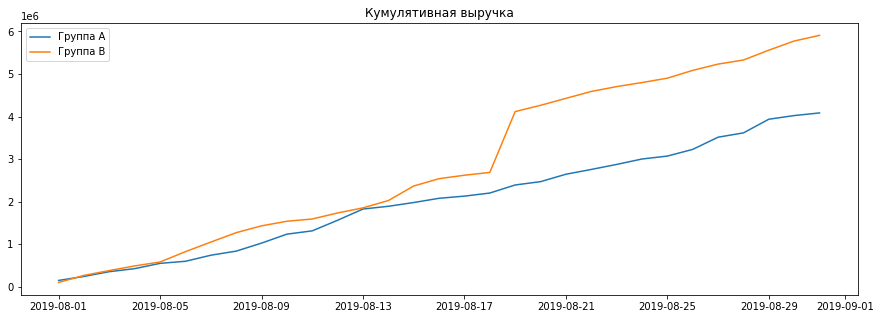

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.title('Кумулятивная выручка') 
plt.legend();

В течение всего времени выручка постепенно увеличивается, но в группе B заметен резкий скачок в конце 2 недели. Это может быть связано с увеличением числа заказов

**Строю график кумулятивного среднего чека для обеих групп**

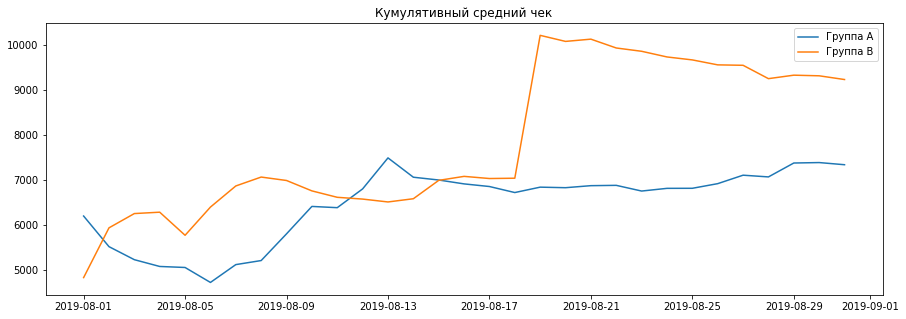

In [17]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.title('Кумулятивный средний чек') 
plt.legend();

На графике видно, как в то же время, что и на графике кумулятивной выручки, возрасла выручка, возрос средний чек, соответственно в этот период времени попало несколько крупных заказов. Речь лишь о группе B

**Строю график относительного изменения кумулятивного среднего чека группы B к группе A**

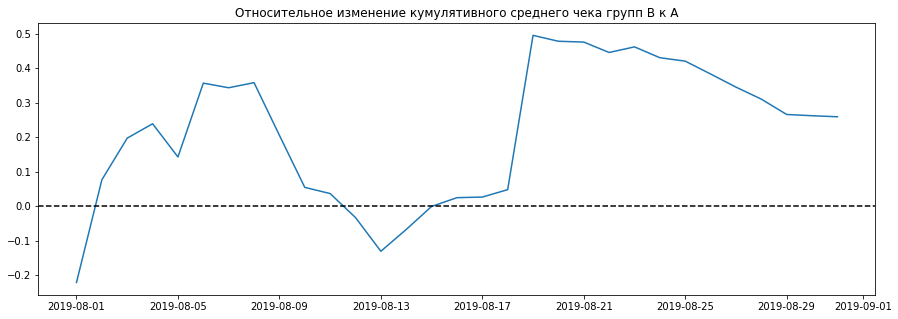

In [18]:
plt.figure(figsize=(15,5))
plt.title('Относительное изменение кумулятивного среднего чека групп B к A') 

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График относительного изменения среднего чека между группа во многих местах постоянно меняется. Это также может быть связано с крупными заказами в определённые периоды времени

**Строю график кумулятивного среднего количества заказов на посетителя по группам**

**Считаю количество заказов по пользователям**

In [19]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitor_id  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


**Считаю количество заказов по пользователям по группам, вывожу на экран**

In [20]:
# разделяю пользователей на группы A и B
visitorsGroup = orders[['visitor_id', 'group']]

# разделяю заказы на группы A и B
ordersGroup = orders[['transaction_id', 'visitor_id']].merge(visitorsGroup, on='visitor_id', how='left')

# расчет количества заказов по пользователям в группе A
ordersByUsersA = (
    ordersGroup[ordersGroup['group'] =='A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsersA.columns = ['visitor_id', 'orders']

# расчет количества заказов по пользователям в группе B
ordersByUsersB = (
    ordersGroup[ordersGroup['group'] =='B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsersB.columns = ['visitor_id', 'orders']

**Строю график кумулятивного среднего количества заказов на посетителя**

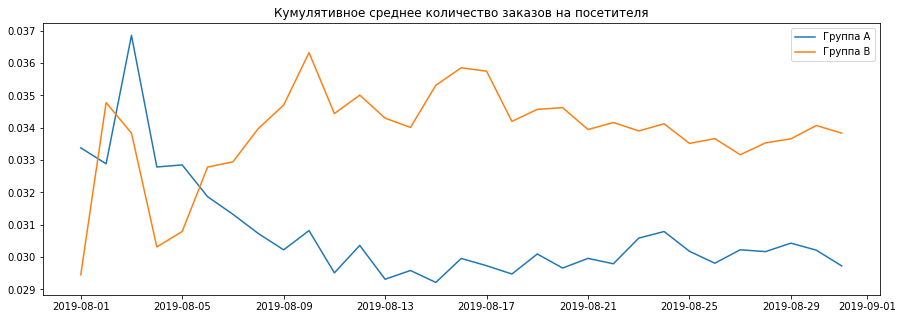

In [21]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.legend();

Сначала конверсия группы А имела хорошие показатели, но после 3 августа она начала резко падать, а конверсия группы B 4 августа начала резко расти и обогнала группу А

**Строю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

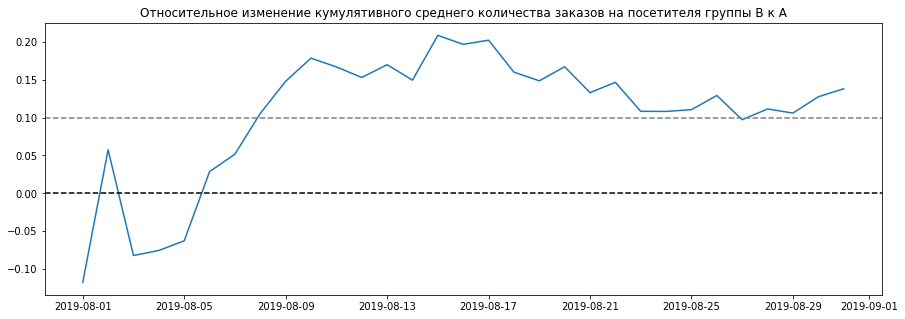

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к A')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6]) 
plt.show()

Группа B почти с самого начала впереди по показателю изменения среднего количества заказов на посетителя

**Строю точечный график количества заказов по пользователям**

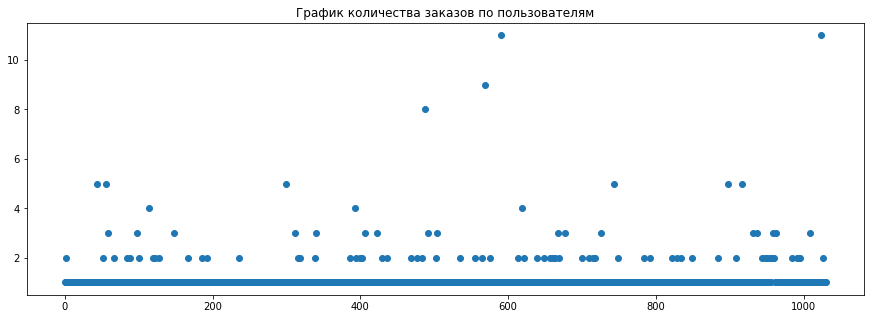

In [23]:
plt.figure(figsize=(15,5))
plt.title('График количества заказов по пользователям')
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Больше всего пользователей, которые сделали 1 заказ, чуть меньше - 2 заказа, ещё меньше - 3 заказа. Скорее всего 8 и выше заказов можно считать аномальными выбросами, но в этом ещё нужно убедиться

**Считаю 95-й и 99-й перцентили количества заказов на пользователя. Считаю границу для определения аномальных пользователей**

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


95% пользователей совершает не более 1 заказа , 99% совершает 2 заказа. Всё, что выше 99% - аномалия

**Строю точечный график стоимостей заказов**

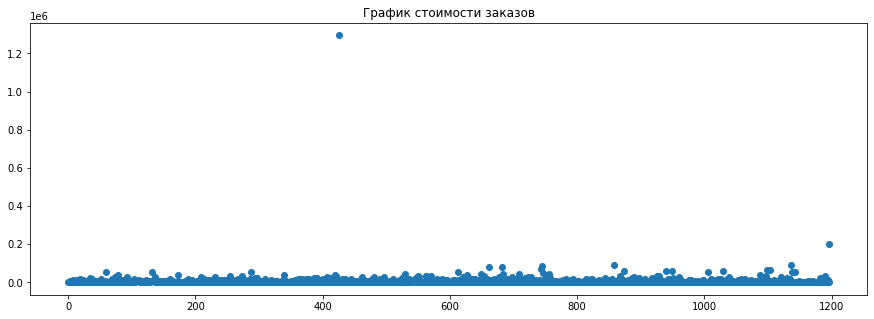

In [25]:
plt.figure(figsize=(15,5))
plt.title('График стоимости заказов')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Все суммы заказов находятся ниже 200000 за исключением выброса свыше 1000000

**Считаю 95-й и 99-й перцентили стоимости заказов. Выбираю границу для определения аномальных заказов**

In [26]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Лишь 5% заказов стоят дороже 28000. Это и будет планкой для определния аномальных значений

**Считаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [28]:
# создаю переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# в них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group']=='A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group']=='B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [29]:
# сообщаю переменные ordersByUsersA и ordersByUsersB.
# в них для пользователей, которые заказывали хотя бы 1 раз, указываю число заказов

ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# сообщаю переменные sampleA и sampleB, в которых пользователям из разных групп будет соотетствовать количество заказов

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

* Нулевая гипотеза (H_0): статистически значимых различий между конверсиями нет
* Альтернативная гипотеза (H_1): статистически значимые различия есть

In [30]:
print("alpha =",0.05)

print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Нулевую гипотезу отвергаю, так как p-value ниже alpha, значит, различия между группами A и B есть. Относительная разница в конверсиях - 13,8%

**Считаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Отталкиваясь от предыдущих пунктов, за аномальные данные я посчитал следующее:

* пользователь совершает 3 заказа и больше
* пользователь совершает заказ дороже 28000

Вывожу на экран количество аномальных значений

In [31]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных значений" ,len(abnormalUsers)) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего аномальных значений 74


Фильтрую данные, исключая аномальные значения

In [32]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

* Нулевая гипотеза (H_0): статистически значимых различий между конверсиями нет
* Альтернативная гипотеза (H_1): статистически значимые различия есть

In [33]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.013
Относительный показатель 'B' и 'A' = 0.173


Нулевую гипотезу отвергаю, так как p-value ниже alpha, значит, различия между группами A и B есть. Относительная разница в конверсиях - 17,3%. Практически никакой разницы между статистической значимостью различий в среднем количестве заказов на посетителя между группами по «очищенным» данным и «сырым»

**Считаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

* Нулевая гипотеза (H_0): статистически значимых различий между конверсиями нет
* Альтернативная гипотеза (H_1): статистически значимые различия есть

Чтобы рассчитать статистическую значимость различий в среднем чеке, передам критерию mannwhitneyu() данные о выручке с заказов. А ещё найду относительные различия в среднем чеке между группами

In [35]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


p-value гораздо выше alpha, соответсвенно я не отвергаю нулевую гипотезу и считаю, что значимых различий в среднем чеке между группами по "сырым" данным нет. Средний чек группы 'B' выше среднего чека группы 'A' на 26%

**Считаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

* Нулевая гипотеза (H_0): статистически значимых различий между конверсиями нет
* Альтернативная гипотеза (H_1): статистически значимые различия есть

In [ ]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value гораздо выше alpha, а также оно ещё немного увеличилось по сравнению с результатами в 'сырых' данных, соответсвенно я не отвергаю нулевую гипотезу и считаю, что значимых различий в среднем чеке между группами по "сырым" данным нет. Средний чек группы 'B' ниже среднего чека группы 'A' на 2%

## Результаты A/B теста

Варианты решений:

* **Остановить тест, зафиксировать победу одной из групп.**
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

Обрабатывая результаты проведенного А/В теста, можно смело зафиксировать победу группы В. Прирост конверсии в этой группе составил выше 17% по сравнению с группой А. 

**Результат: остановить тест, зафиксировать победу группы B**